# **Week 5: Introduction to Random Variables**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```
*A random variable is neither random nor a variable.*

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [48]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

**Do not modify the following**

In [49]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Test passed 🥳


## **What Is A Random Variable? (Optional)**


A **random variable** is not really a “variable” in the usual algebraic sense, and it’s not “random” in itself.  
Formally, it is a **function** that maps outcomes of an experiment (from the *sample space*) to numerical values.

Mathematically:  
$$
X: \Omega \rightarrow \mathbb{R}
$$
where $\Omega$ is the set of all possible outcomes of the experiment.

### **Coin Tossing Experiment**
- Experiment: Toss a fair coin twice.  
- Sample space: $\Omega = \big\{\text{HH}, \text{HT}, \text{TH}, \text{TT}\big\}$
- Random variable: $X(\omega)$ = number of heads in the outcome $\omega \in \Omega$.  
- Mapping:  
  - HH → 2  
  - HT → 1  
  - TH → 1  
  - TT → 0  

### **Gaussian Random Variables**
In many problems, $X$ is **assumed** to follow a Gaussian (normal) distribution:  
$$
X \sim N(\mu, \sigma^2)
$$  
Here, there might be a physical experiment (e.g., measurement errors) *or* $X$ could be a purely theoretical construct used in modelling.

### **Why Do We Use This Complicated Definition?**

You may wonder why we use such a complicated and unintuitive definition — why call it a *function* instead of a *variable* or something that is *random*?

In probability theory, we **start** by defining probability on a sample space $\Omega$ (the set of all possible outcomes of the experiment). A random variable is just a way to **translate** those outcomes into numbers. This is to ensure that probability rules (i.e., axioms of probability) are always satisfied and that all probability assignments are consistent.  

Relying on a well-defined sample space $\Omega$ gives us a **common foundation**:  
- Every random variable is defined as a function on $\Omega$,  
- Probabilities of events like $P(X \le 2)$ are automatically consistent with the probability measure on $\Omega$,  
- This guarantees that all rules (e.g., $0 \le P(\cdot) \le 1$, $P(\Omega) = 1$, additivity for disjoint events) hold without having to check each case separately.



This translation makes it possible to define important tools like the **PMF**, **PDF**, and **CDF** of $X$. Without starting from $\Omega$, these concepts would not have a rigorous foundation.



#### **Example**


When we write:

$$
P(X \leq 2)
$$

we really mean:

$$
P(\{\omega \in \Omega : X(\omega) \leq 2\})
$$

That is, we are looking for the probability of **all outcomes in the sample space** $ \Omega $  whose random variable value is less than or equal to 2. We can verify if some common probability rules such as non-negativity and complement rule still hold.

- Non-negativity  
By definition of a probability measure:  

$$
0 \le P(E) \le 1 \quad \text{for any event } E \subseteq \Omega
$$  

Set $E = \{\omega \in \Omega : X(\omega) \le 2\}$. Then:  

$$
0 \le P(X \le 2) = P(E) \le 1
$$  

- Complement Rule

Let $A \subseteq \mathbb{R}$, e.g., $A = (-\infty, 2]$. Its complement is $A^c = (2, \infty)$. Then:  

$$
\{\omega : X(\omega) \in A^c\} = \Omega \setminus \{\omega : X(\omega) \in A\}  
$$  

So by the complement property of $P$ on $\Omega$:  

$$
P(X \in A^c) = P(\Omega) - P(X \in A) = 1 - P(X \in A)
$$  


### **Physical vs. Abstract Random Variables**

In this workshop, we will encounter several random variables.  Some are intuitive—like the Bernoulli or binomial —and can be linked to real-life experiments we understand.  

However, not every random variable has a tangible experiment behind it.  Some are **thought experiments** or abstract models—black boxes that produce values according to certain probabilistic rules.  

In practice, we often focus more on the **distributional properties** of a random variable—such as its PMF, PDF, or CDF—rather than the precise way it is defined mathematically. It is common that people refer to a random variable directly by its PMF or PDF (for example, saying “$X$ is Normal with mean $\mu$ and variance $\sigma^2$”) rather than giving a fully formal definition in terms of the underlying sample space.


## **Random Variable Simulation in `R`**

`R` provides a wide range of built-in functions for computation and simulation with common distributions, including well-known ones such as the binomial, uniform, Gaussian (normal), and exponential distributions, to name just a few. These functions follow a consistent naming convention and typically begin with specific prefixes (as listed below).

| Prefix | Purpose | Example (Normal Distribution) |
|--------|---------|-------------------------------|
| `r`    | Random number generation | `rnorm(5, mean = 0, sd = 1)`
| `d`    | Density / mass function | `dnorm(0, mean = 0, sd = 1)`|
| `p`    | Cumulative distribution function | `pnorm(1.96, mean = 0, sd = 1)`|
| `q`    | Quantile function (inverse CDF) | `qnorm(0.975, mean = 0, sd = 1)`|


Here’s a compact summary table of the main probability distributions in `R` and their function families (`d`, `p`, `q`, `r`):

| Distribution        | Density/PMF    | CDF        | Quantile    | Random       |
|---------------------|----------------|------------|-------------|--------------|
| Beta                | `dbeta()`      | `pbeta()`  | `qbeta()`   | `rbeta()`    |
| Binomial            | `dbinom()`     | `pbinom()` | `qbinom()`  | `rbinom()`   |
| Cauchy              | `dcauchy()`    | `pcauchy()`| `qcauchy()` | `rcauchy()`  |
| Chi-square          | `dchisq()`     | `pchisq()` | `qchisq()`  | `rchisq()`   |
| Exponential         | `dexp()`       | `pexp()`   | `qexp()`    | `rexp()`     |
| F (Fisher–Snedecor) | `df()`         | `pf()`     | `qf()`      | `rf()`       |
| Gamma               | `dgamma()`     | `pgamma()` | `qgamma()`  | `rgamma()`   |
| Geometric           | `dgeom()`      | `pgeom()`  | `qgeom()`   | `rgeom()`    |
| Hypergeometric      | `dhyper()`     | `phyper()` | `qhyper()`  | `rhyper()`   |
| Log-normal          | `dlnorm()`     | `plnorm()` | `qlnorm()`  | `rlnorm()`   |
| Logistic            | `dlogis()`     | `plogis()` | `qlogis()`  | `rlogis()`   |
| Multinomial         | —              | —          | —           | `rmultinom()`|
| Negative Binomial   | `dnbinom()`    | `pnbinom()`| `qnbinom()` | `rnbinom()`  |
| Normal (Gaussian)   | `dnorm()`      | `pnorm()`  | `qnorm()`   | `rnorm()`    |
| Poisson             | `dpois()`      | `ppois()`  | `qpois()`   | `rpois()`    |
| Student’s t         | `dt()`         | `pt()`     | `qt()`      | `rt()`       |
| Uniform             | `dunif()`      | `punif()`  | `qunif()`   | `runif()`    |
| Weibull             | `dweibull()`   | `pweibull()`| `qweibull()`| `rweibull()` |
| Wilcoxon Rank       | `dwilcox()`    | `pwilcox()`| `qwilcox()` | `rwilcox()`  |
| Wilcoxon Signed Rank| `dsignrank()`  | `psignrank()`| `qsignrank()`| `rsignrank()` |


Note that the random variables supported in R represent only a small subset of the possible random variables. In practice, there are countless other random variables whose forms can be highly complex and may not even have a conventional name (as long as they are defined with a valid probability density function). Techniques for working with such distributions are beyond the scope of this unit.

## **Discrete Random Variables**

Discrete random variables take on discrete values typically from the domain $\mathbb{N}$, i.e. $X=0,1,\ldots$. For discrete random variables, probabilities are assigned to specific values, e.g. $X= 2$.




### **Bernoulli Distribution**  
A Bernoulli distribution is a single experiment with exactly two outcomes: *success* (with probability $p$) and *failure* (with probability $1-p$).  

$$
X \sim \text{Bernoulli}(p), \quad
P(X=1) = p, \quad P(X=0) = 1-p.
$$

An example of a Bernoulli trial is a single coin toss, whose outcome can be measured by a Bernoulli distribution.


### **Binomial Distribution**##

A Binomial random variable $Y$ counts the number of successes in $n$ independent Bernoulli$(p)$ trials:  

$$
Y = \sum_{i=1}^{n} X_i, \quad X_i \overset{\text{iid}}{\sim} \text{Bernoulli}(p), \quad
Y \sim \text{Binomial}(n,p).
$$

Here, `i.i.d.` stands for *independent and identically distributed*.  This means that each $X_i$ represents the same Bernoulli trial (with success probability $p$), conducted independently across the $n$ trials. If `n = 1`, $Y \sim \text{Bernoulli}(p)$.

| Property             | Formula |
|----------------------|---------|
| **Support**          | $$y \in \{0,1,2,\dots,n\}$$ |
| **PMF**              | $$P(Y = y) = \binom{n}{y} p^{\,y}(1-p)^{\,n-y}, \quad y = 0,1,\dots,n$$ |
| **Expectation**      | $$\mathbb{E}[Y] = np$$ |
| **Variance**         | $$\mathbb{V}(Y) = np(1-p)$$ |


The Binomial distribution is very versatile and is used to model the number of successes in a fixed number of independent trials, each with the same probability of success. A simple example is modelling the number of Heads after `n` coin tosses.


#### **R Quick Reference**

`R` supports the following functions for computing distributional quantities and simulating from binomial distributions:

- `dbinom(x, size, prob, log = FALSE)` computes PMF of `Binomial(size,p)`;
- `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)` computes CDF of `Binomial(size,p)`;
- `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)` computes `p`-quantile of `Binomial(size,p)`;
- `rbinom(n, size, prob)` simulates `n` random numbers from `n` independent r.v. following `Binomial(size,p)`.

Here,

- `x`, `q`: The number of successes.
- `size`: The number of Bernoulli trials. If `size = 1`, we refer to the Bernoulli distribution.
- `prob`: The probability of success
- `log`: Whether or not we want to return log PMF.
- `lower.tail`: If `TRUE`, return $\Pr(X \leq x)$ where $X \sim \text{Binomial(size,p)}$. If `FALSE`, return $\Pr(X > x)$.

#### **R Examples**


##### **Example 1**

Toss a fair coin 100 times and count the number of heads. Repeat this entire experiment 10 times using simulation.

We can model the outcome of this experiment by a random variable $Y \sim \text{Binomial(n,p)}$ where $n = 100$ and $p = 0.5$. To simulate random numbers of this r.v., we can use the `rbinom()` function:

In [50]:
rbinom(n = 10, size = 100, p = 0.5)

[1] 54 44 47 41 50 57 50 47 53 45

##### **Example 2**
A fair coin is tossed $10$ times. What is the probability of observing exactly 6 heads?

We can model the outcome of this experiment by a random variable $Y \sim \text{Binomial(n,p)}$ where $n = 10$ and $p = 0.5$. To calculate the probability of observing exactly 6 heads, we can use the PMF of `Binomial(10,0.5)`

$$P(Y = 6) = \binom{10}{6} 0.5^{6}(1-0.5)^{10-6}.$$

In [51]:
choose(10,6)*0.5^6*(1-0.5)^{10-6}

[1] 0.2050781

We can also use the `dbinom()` function in `R` to compute this probability:

In [52]:
dbinom(x = 6, size = 10, prob = 0.5)

[1] 0.2050781

##### **Example 3**
A fair coin is tossed $10$ times. Compute probability of observing at least 6 heads.



We can model the outcome of this experiment by a random variable $Y \sim \text{Binomial(n,p)}$ where $n = 10$ and $p = 0.5$. We are interested in computing:

$$\Pr(Y \geq 6).$$

This can be done using the `pbinom()` function in `R`.

Does the below command give us the correct answer?

In [53]:
pbinom(q = 6, size = 10, prob = 0.5, lower.tail = FALSE)

[1] 0.171875

The answer is **NO** as when `lower.tail = FALSE`, `dbinom` computes $\Pr(X > x)$, not $\Pr(X >= x)$.

There are two alternative solutions to address this: Computing $1 - \Pr(Y \leq 5)$ or $\Pr(Y > 5)$.

In [54]:
1 - pbinom(q = 5, size = 10, prob = 0.5, lower.tail = TRUE)

[1] 0.3769531

In [55]:
pbinom(q = 5, size = 10, prob = 0.5, lower.tail = FALSE)

[1] 0.3769531

##### **Example 4**

A factory makes 5000 light bulbs an hour, and each bulb has a 1% chance of being defective. What is the number of defective bulbs that we would rarely exceed—specifically, in 95% of the batches?




We can model the number of defects in each batch by a random variable $Y \sim \text{Binomial(n,p)}$ where $n = 5000$ and $p = 0.01$.

The number of defective bulbs that we would not exceed in 95% of the batches is $95\%$-quantile of `Binomial(n,p)`, which can be computed using the `qbinom()` function.

In [56]:
qbinom(p = 0.95, size = 5000, prob = 0.01, lower.tail = TRUE)

[1] 62

#### **Exercise**

A factory makes 10000 light bulbs an hour, and each bulb has a 5% chance of being defective.


- What is the number of defective bulbs that we would rarely exceed—specifically, in 95% of the batches?
- A quality control expert wants to answer the question. However, there is no built-in `qbinom()` function on his computer, so he uses a simulation-based approach to answer the question:
  - Simulate $10^6$ random numbers from the corresponding Binomial distribution.
  - Estimate the 95%-quantile using the sample data.  
  - Compute the sample mean and sample variance and compare them to the theoretical values.








<details>
<summary>▶️ Click to show the solution</summary>

```r
print("The number of defective bulbs not exceeded in 95% of the batches")
qbinom(p = 0.95, size = 10000, prob = 0.05)

print(" Estimated number of defective bulbs not exceeded in 95% of the batches")
x = rbinom(n = 10^6, size = 10000, prob = 0.05)
quantile(x, probs = 0.95)

print("Estimated mean")
mean(x)
print("Theoretical mean")
10000*0.05

print("Estimated variance")
var(x)
print("Theoretical variance")
10000*0.05*(1-0.05)

```

</details>

### **Poisson Distribution**

A Poisson random variable models the number of events occurring in a fixed interval of time or space, assuming the events occur **independently** and at a **constant average rate** $\lambda > 0$.  

$$
Y \sim \text{Poisson}(\lambda), \quad
P(Y=y) = \frac{e^{-\lambda} \lambda^y}{y!}, \quad y = 0,1,2,\dots
$$

| Property             | Formula |
|----------------------|---------|
| **Support**          | $$y \in \{0,1,2,\dots\}$$ |
| **PMF**              | $$P(Y = y) = \frac{e^{-\lambda} \lambda^y}{y!}, \quad y = 0,1,2,\dots$$ |
| **Expectation**      | $$\mathbb{E}[Y] = \lambda$$ |
| **Variance**         | $$\mathbb{V}(Y) = \lambda$$ |







A key property of the Poisson distribution is that its **mean equals its variance**:

$$
\mathbb{E}[Y] = \mathrm{Var}(Y) = \lambda
$$

This property makes it suitable for modelling situations where the average number of events is roughly equal to the variability in the number of events—for example, counting rare defects in a batch of products.  

If the data show **overdispersion** (variance > mean) or **underdispersion** (variance < mean), the Poisson distribution may not be appropriate. In such cases, consider alternative distributions such as the **Negative Binomial** for overdispersed counts.


#### **Poisson Distribution As The Limiting Behavior Of Binomial Distribution**
The Poisson distribution can be seen as the limit of a Binomial distribution where the number of trials $n$ approaches infinity and the probability of success $p$ approaches 0, but the expected number of successes $\lambda = n p$ remains finite:

$$
\text{Binomial}(n, p) \;\; \xrightarrow[n \to \infty, p \to 0]{\text{with } np = \lambda} \;\; \text{Poisson}(\lambda)
$$


#### **Example**


Suppose we want to model the number of customers arriving in one hour.  

1. Divide the hour into $n$ very small intervals. In each interval, a customer either **arrives** (with probability $p$) or **does not arrive**.  
2. Let $Y \sim \text{Binomial}(n, p)$ be the total number of arrivals in the hour.  
3. If the intervals are very small, then $n$ is large and $p$ is small, while the expected number of arrivals remains finite:  

$$
\lambda = n \cdot p
$$

4. As $n \to \infty$ and $p \to 0$ such that $np = \lambda$ is constant, the Binomial distribution **approaches a Poisson distribution**:

$$
Y \sim \text{Binomial}(n, p) \;\;\longrightarrow\;\; Y \sim \text{Poisson}(\lambda)
$$



#### **R Quick Reference**

`R` supports the following functions for computing distributional quantities and simulating from Poisson distributions:

- `dpois(x, lambda, log = FALSE)` computes PMF of `Poisson(lambda)`;  
- `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)` computes CDF of `Poisson(lambda)`;  
- `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)` computes `p`-quantile of `Poisson(lambda)`;  
- `rpois(n, lambda)` simulates `n` random numbers from `Poisson(lambda)`.

Here:

- `x`, `q`: Number of events.  
- `lambda`: Expected number of events (mean rate).  
- `log`: Whether or not to return log PMF.  
- `lower.tail`: If `TRUE`, return $\Pr(Y \leq x)$; if `FALSE`, return $\Pr(Y > x)$.

#### **Exercises**

The number of emails a server receives in an hour is modeled as a Poisson random variable with $\lambda = 10$.



##### **Exercise 1**

Simulate the number of emails received in 10 separate hours.


<details>
<summary>▶️ Click to show the solution</summary>

```r
rpois(n = 10, lambda = 5)
```

</details>

##### **Exercise 2**

What is the probability that exactly 3 emails are received in one hour?

<details>
<summary>▶️ Click to show the solution</summary>
These are equivalent solutions
```r
(5^3 * exp(-5)) / factorial(3)
```

```r
dpois(x = 3, lambda = 5)
```

</details>

##### **Exercise 3**
Calculate the probability of receiving between 3 and 6 emails inclusive in an hour.

<details>
<summary>▶️ Click to show the solution</summary>
These are equivalent solutions

```r
ppois(6, lambda = 5) - ppois(2, lambda = 5)
```

```r
sum((5^(3:6) * exp(-5)) / factorial(3:6))
```

</details>

##### **Exercise 4**

Simulate random numbers from a Binomial random variable with parameters $n = 10^6$ and $p = 10^{-3}$. Compare the simulated distribution to the corresponding Poisson distribution with $\lambda = np$ using overlapping histograms.

**Hint**: Use `geom_histogram(position = "identity", aes(y = after_stat(density)), alpha = 0.5)`




<details>
<summary>▶️ Click to show the solution</summary>

```r
nSim = 10^6
n = 10^6
p = 10^-3
binom = rbinom(nSim, size = n, prob = p)
pois  = rpois(nSim, lambda = n*p)

results  = data.frame(
  value = c(binom, pois),
  distribution = rep(c("Binomial", "Poisson"), each = nSim)
)

ggplot(results, aes(x = value, fill = distribution)) +
  geom_histogram(aes(y = after_stat(density)), position = "identity", alpha = 0.5, bins = 30) +
  scale_fill_manual(values = c("red", "blue")) +
  labs(title = "Binomial vs. Poisson Simulation",
       x = "Number of Successes",
       y = "Frequency") +
  theme_minimal()
  ```
</details>


## **Continuous Random Variables**

Continuous random variables take on values over a continuum, which, as in the case of discrete variables may or may not be bounded. For continuous random variables events are defined as a subset of the sample space, i.e. $2<X<4$. The probability that a continuous random variable takes on a specific value is $0$.

### **Uniform Random Variables**

A continuous uniform random variable has **equal likelihood**  of taking any value in a given interval \([a, b]\):  

$$
X \sim \text{Uniform}(a, b), \quad f_X(x) =
\begin{cases}
\frac{1}{b-a}, & a \le x \le b \\
0, & \text{otherwise}
\end{cases}
$$

**Properties:**

| Property             | Formula |
|----------------------|---------|
| **Support**          | $$x \in [a, b]$$ |
| **PDF**              | $$f_X(x) = \frac{1}{b-a}$$ |
| **CDF**              | $$F_X(x) = \frac{x-a}{b-a}, \quad a \le x \le b$$ |
| **Expectation**      | $$\mathbb{E}[X] = \frac{a+b}{2}$$ |
| **Variance**         | $$\mathrm{Var}(X) = \frac{(b-a)^2}{12}$$ |

The continuous uniform distribution is often used to model random numbers with equal likelihood within an interval. However, the biggest application of the uniform random variable is probably in **random number simulation**.  

Computers generate **pseudo-random numbers** from a uniform distribution because, from a uniform random variable, we can transform it into **almost any other distributions** using various sampling methods (e.g., inverse transform sampling). This makes the uniform distribution a fundamental building block for stochastic modelling.

#### **Inverse Transform Sampling**

Let $X$ be a continuous random variable with cumulative distribution function (CDF) $F_X(x)$, which is strictly increasing on its support.  Our goal is to generate random samples from $X$ using uniform random numbers.  

The following algorithm called inverse transform sampling can be used to simulate random numbers from $X$:

1. Generate $U \sim \text{Uniform}(0,1)$.  
2. Compute $X = F_X^{-1}(U)$, where $F_X^{-1}$ is the inverse of the CDF.  


By construction, $P(X \le x) = P(F_X^{-1}(U) \le x) = P(U \le F_X(x)) = F_X(x)$.  

Thus, $X$ generated this way has the desired distribution with CDF $F_X(x)$.  

##### **Relationship Between CDF and Quantile Function**

For a continuous random variable $X$ with positive PDF everywhere on its support:

- The CDF is $F_X(x) = P(X \le x)$  
- The **quantile function** (inverse CDF) is $F_X^{-1}(p)$, which returns the value $x$ such that $P(X \le x) = p$  

In other words, for these continuous distributions, the quantile function and the CDF are inverses of each other:

$$
F_X(F_X^{-1}(p)) = p, \quad F_X^{-1}(F_X(x)) = x
$$

This implies that we can use functions like `qunif`, `qnorm`, and `qexp` to compute inverse CDF.

#### **R Quick Reference**

`R` supports the following functions for computing distributional quantities and simulating from uniform distributions:

- `dunif(x, min = a, max = b)`: computes PDF of `Unif(a,b) at `x`  
- `punif(q, min = a, max = b, lower.tail = TRUE)`: computes CDF of `Unif(a,b)` at `q`  
- `qunif(p, min = a, max = b, lower.tail = TRUE)`:  computes `p`-quantile of `Unif(a,b)`
- `runif(n, min = a, max = b)` – simulate `n` random numbers from `Unif(a,b)`

Here:

- `x`, `q`: point(s) to evaluate PDF/CDF or quantile  
- `n`: number of random numbers to simulate  
- `min`, `max`: lower and upper bounds of the uniform interval  (By default, `min = 0` and `max = 1`)
- `lower.tail`: If `TRUE`, return $\Pr(X \leq x)$ where $X \sim \text{Unif(a,b)}$. If `FALSE`, return $\Pr(X > x)$.

**However, the equality sign does NOT matter here as** $\Pr(X = x) = 0$ as $X$ is a continuous r.v.



#### **Exercise**

The exponential distribution `Exp(1)` has the CDF:

$$
F_X(x) = \Pr(X \leq x) = 1 - e^{-x}, \, x \geq 0.
$$

- Use the inverse transform sampling method to simulate `n` random numbers from `Exp(1)`.
- In `R`, we can simulate `n` random numbers from `Exp(1)` using `rexp(n)`. Simulate `n` random numbers from `Exp(1)` then compare the two simulated distributions using overlapping histograms.

**Hint**: Use `geom_histogram(position = "identity", aes(y = after_stat(density)), alpha = 0.5)`




<details>
<summary>▶️ Click to show the solution</summary>
We can simulate `Exp(1)` random numbers by:

1. Generating uniform random numbers `U ~ Uniform(0,1)`.
2. Applying the inverse CDF:

$$
X = F_X^{-1}(U) = -\ln(1-U)
$$

```r
n = 10000
U = runif(n)
X_its = -log(1 - U)
X_rexp = rexp(n)

data.frame(
  value = c(X_its, X_rexp),
  method = rep(c("its", "rexp"), each = n)
) %>%
  ggplot(aes(x = value, fill = method)) +
  geom_histogram(position = "identity", aes(y = after_stat(density)), alpha = 0.75)

```

</details>


### **Exponential Distribution**

A continuous random variable `X` follows an exponential distribution with rate `λ > 0` if its PDF is:

$$
f_X(x) = \lambda e^{-\lambda x}, \quad x \ge 0
$$


| Property        | Formula        |
|-----------------|----------------|
| **Support**     |  $$x \ge 0$$  |
| **PDF**         |  $$f_X(x) = \lambda e^{-\lambda x}$$  |
| **CDF**         |  $$F_X(x) = 1 - e^{-\lambda x}$$  |
| **Expectation** |  $$\mathbb{E}[X] = 1/\lambda$$  |
| **Variance**    |  $$\mathbb{V}(X) = 1/\lambda^2$$  |


The exponential distribution is often used to model **waiting times between independent events** that occur at a constant average rate.


#### **Memoryless Property**

The exponential distribution is **memoryless**, which means that for `X ~ Exp(λ)`:

$$
\Pr(X > s + t \mid X > s) = \Pr(X > t), \quad s, t \ge 0
$$

In words, the probability of waiting at least an additional `t` units of time does **not** depend on how much time has already elapsed.

If you have already been waiting in a queue for some time, the memoryless property implies that your expected remaining wait is **the same** as if you had just arrived. This can feel like a worst-case scenario, since your past waiting does not reduce your future waiting time.



#### **R Quick Reference**


`R` supports the following functions for computing distributional quantities and simulating from exponential distributions:

- `dexp(x, rate, log = FALSE)` – **compute** the PDF of `Exp(rate)`  
- `pexp(q, rate, lower.tail = TRUE, log.p = FALSE)` – **compute** the CDF of `Exp(rate)`  
- `qexp(p, rate, lower.tail = TRUE, log.p = FALSE)` – **compute** the quantile (inverse CDF) of `Exp(rate)`  
- `rexp(n, rate)` – **simulate** `n` random numbers from `Exp(rate)`

Here:

- `x`, `q`: Value(s) at which PDF or CDF is evaluated  
- `rate`: Rate parameter λ of the exponential distribution  
- `p`: Probability for the quantile function  
- `lower.tail`: If TRUE, returns P(X ≤ x); if FALSE, returns P(X > x)  


#### **Exercises**


##### **Exercise 1**


In a hypothetical scenario, the wait time for the CityDog ferry follows an exponential distribution with a mean of 15 minutes.  

Compute the probability that a passenger’s wait time for the CityDog ferry is between 10 and 20 minutes.




<details>
<summary>▶️ Click to show the solution</summary>


The mean wait time is 15 minutes, so the rate parameter is:

$$
\lambda = \frac{1}{\text{mean}} = \frac{1}{15}.
$$

We want to compute:

$$
\begin{align}
P(10 \le X \le 20) &= F_X(20) - F_X(10) \\ &= \left(1 - e^{-\lambda \cdot 20}\right) - \left(1 - e^{-\lambda \cdot 10}\right) \\&= e^{-\lambda \cdot 10} - e^{-\lambda \cdot 20}.
\end{align}
$$

The two solutions are equivalent:

```r
exp(-1/15*10) - exp(-1/15*20)
```

```r
pexp(20, rate = 1/15) - pexp(10, rate = 1/15)
```


</details>


##### **Exercise 2**

Using the inverse transform method and the `qexp()` function, simulate `n` random wait times for passengers of the CityDog ferry (see Exercise 1). Visualise the simulated distribution using a histogram. Is it realistic?



<details>
<summary>▶️ Click to show the solution</summary>


```r
n = 1000
U = runif(n)
X = qexp(U, rate = 1/15)
X %>% hist()
```

</details>


##### **Exercise 3**


Suppose the waiting time (in hours) for a customer service call follows `Exp(lambda = 0.5)`.  Compute the probability that a customer waits more than 3 hours given that they have already waited 2 hours.  



<details>
<summary>▶️ Click to show the solution</summary>

Given $X \sim \text{Exp(0.5)}$, to calculate $\Pr(X > 3| X > 2)$, we can use the conditional probability formula:

$$
\Pr(X > 3| X > 2) =  \frac{\Pr(X > 3 \text{ and } X > 2)}{\Pr(X > 2)} = \frac{\Pr(X > 3)}{\Pr(X > 2)}.
$$

```r
pexp(q = 3, rate = 0.5, lower.tail = FALSE)/pexp(q = 2, rate = 0.5, lower.tail = FALSE)
```
However, as $X$ follows a exponential distribution, because of the memoryless property of exponential distributions, the probability that a customer waits more than a certain additional time does not depend on how long they have already been waiting.  Then

$$
\Pr(X > 3| X > 2) = \Pr(X > (3-2)) = \Pr(X > 1).
$$

```r
pexp(q = 1, rate = 0.5, lower.tail = FALSE)

```

</details>


### **Gaussian (Normal) Distribution**

A Gaussian (or normal) distribution is a continuous distribution that models many natural phenomena. It is fully characterised by a mean ($\mu$) and a standard deviation $(\sigma)$ (or equivalently, a variance $(\sigma^2)$).

A random variable $X$ following a normal distribution with mean ($\mu$) and a standard deviation $(\sigma)$ is usually denoted as

$$X \sim \mathcal{N}(\mu, \sigma^2),$$

whose PDF is

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big), \quad x \in \mathbb{R}.
$$

- $\mu$: mean - center of the distribution  
- $\sigma^2$: variance - spread of the distribution

A Gaussian distribution is **bell-shaped and symmetric** around the mean.

| Property        | Formula |
|-----------------|---------|
| Support         | $$x \in \mathbb{R}$$ |
| PDF             | $$f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big)$$ |
| CDF             | $$F(x) = P(X \le x) = \frac{1}{2} \Big[ 1 + \text{erf} \Big( \frac{x-\mu}{\sigma \sqrt{2}} \Big) \Big]$$ |
| Expectation     | $$\mathbb{E}[X] = \mu$$ |
| Variance        | $$\mathbb{V}[X] = \sigma^2$$ |




#### **Linear Transformation of Gaussian Random Variables**
Suppose  
$$
X \sim \mathcal{N}(\mu, \sigma^2),
$$  

and we define a new random variable:  
$$
Y = aX + b,
$$  
where **a, b ∈ ℝ**, and **a ≠ 0**. It is possible to show that  
$$
Y \sim \mathcal{N}(a\mu + b,\; a^2\sigma^2).
$$  

This implies that linear transformations of Gaussian random variables are still Gaussian.


| Transformation         | Mean of Y            | Variance of Y       | Std. Dev of Y |
|------------------------|----------------------|---------------------|---------------|
| $$Y = X$$              | $$\mu$$              | $$\sigma^2$$        | $$\sigma$$    |
| $$Y = aX$$             | $$a\mu$$             | $$a^2\sigma^2$$     | $$|a|\sigma$$ |
| $$Y = X + b$$          | $$\mu + b$$          | $$\sigma^2$$        | $$\sigma$$    |
| $$Y = aX + b$$         | $$a\mu + b$$         | $$a^2\sigma^2$$     | $$|a|\sigma$$ |


#### **R Quick Reference**

`R` supports the following functions for computing distributional quantities and simulating from Gaussian distributions:


- `dnorm(x, mean, sd, log=FALSE)`: computes PDF of `N(mean, sd)` at $x$.
- `pnorm(q, mean, sd, lower.tail=TRUE, log.p=FALSE)`: computes CDF of `N(mean, sd)` at $q$
- `qnorm(p, mean, sd, lower.tail=TRUE, log.p=FALSE)` → `p`-quantile of `N(mean, sd)`
- `rnorm(n, mean, sd)` → simulate `n` random numbers from `N(mean, sd)`

#### **The Z Statistical Table**


The Z statistical table (or *standard normal table*) lists values of the cumulative distribution function (CDF) for the standard normal distribution $Z$,  
$$
Z \sim \mathcal{N}(0, 1),
$$  

which can be created by standardising any Gaussian random variables.

$$
Z = \frac{X - \mu}{\sigma}.
$$  


Each entry in the standard normal table gives a probability of the form:
$$
P(Z \leq z),
$$
for a given $z$. In other words, it tells us the area under the standard normal curve to the left of \(z\).



In [66]:
generateZTable()



|     |   0.00|   0.01|   0.02|   0.03|   0.04|   0.05|   0.06|   0.07|   0.08|   0.09|
|:----|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|-3.4 | 0.0003| 0.0003| 0.0004| 0.0004| 0.0004| 0.0004| 0.0004| 0.0004| 0.0005| 0.0005|
|-3.3 | 0.0005| 0.0005| 0.0005| 0.0005| 0.0006| 0.0006| 0.0006| 0.0006| 0.0006| 0.0007|
|-3.2 | 0.0007| 0.0007| 0.0007| 0.0008| 0.0008| 0.0008| 0.0008| 0.0009| 0.0009| 0.0009|
|-3.1 | 0.0010| 0.0010| 0.0010| 0.0011| 0.0011| 0.0011| 0.0012| 0.0012| 0.0013| 0.0013|
|-3.0 | 0.0013| 0.0014| 0.0014| 0.0015| 0.0015| 0.0016| 0.0016| 0.0017| 0.0018| 0.0018|
|-2.9 | 0.0019| 0.0019| 0.0020| 0.0021| 0.0021| 0.0022| 0.0023| 0.0023| 0.0024| 0.0025|
|-2.8 | 0.0026| 0.0026| 0.0027| 0.0028| 0.0029| 0.0030| 0.0031| 0.0032| 0.0033| 0.0034|
|-2.7 | 0.0035| 0.0036| 0.0037| 0.0038| 0.0039| 0.0040| 0.0041| 0.0043| 0.0044| 0.0045|
|-2.6 | 0.0047| 0.0048| 0.0049| 0.0051| 0.0052| 0.0054| 0.0055| 0.0057| 0.0059| 0.0060|
|-2.5 | 0.0062| 0.0064| 0.0066


##### **Example**

Suppose $X \sim \mathcal{N}(100, 15^2)$. What is $\Pr(X \leq 120)$?
Notice that
$$
\begin{align}
  \Pr(X \leq 120) &= \Pr(\frac{X - 100}{15} \leq \frac{120 - 100}{15}) \\
  &= \Pr(Z > 1.33)
\end{align}
$$
   $$
   Z = \frac{120 - 100}{15} = \frac{20}{15} = 1.33.
   $$
Look up $z = 1.33$ in the Z-table:
   $$
   P(Z \leq 1.33) \approx 0.9082.
   $$
Therefore:
   $$
   P(X \leq 120) \approx 0.9082.
   $$

In [73]:
#By default, pnorm() uses mean = 0 and sd = 1, i.e., standard Gaussian
pnorm(1.33)
pnorm(120, mean = 100, sd = 15)
#You may see a bit different result due to round-off error

[1] 0.9082409

[1] 0.9087888

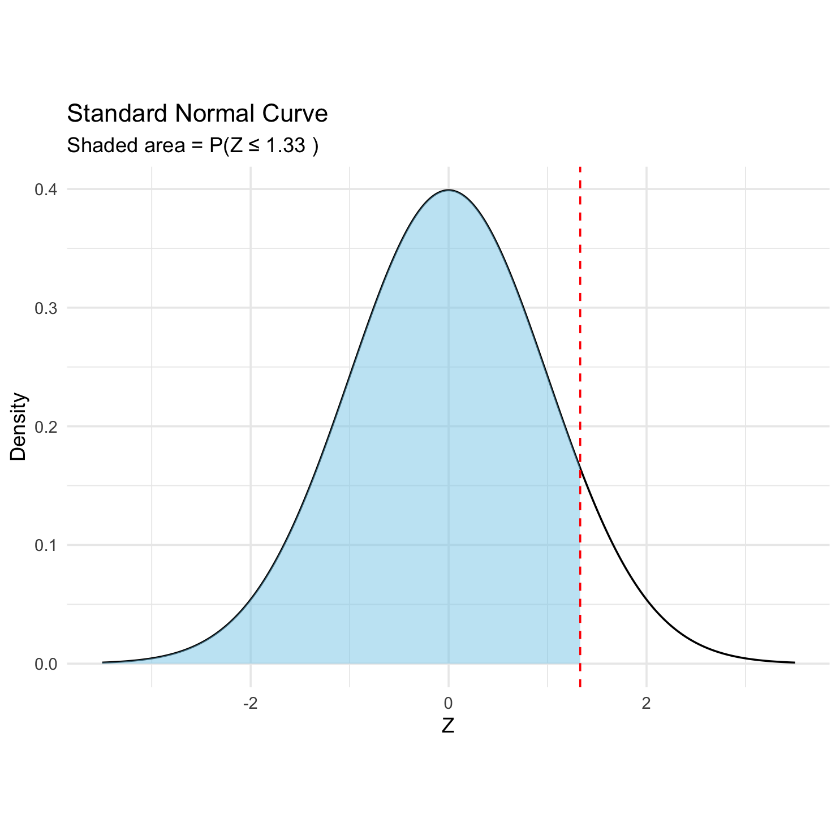

In [71]:

img = readPNG("figures/standard_Gaus.png")
grid.raster(img)

#### **Exercise**

##### **Exercise 1**


The weight of a 500 g package of mince follows a Gaussian probability distribution with a mean of 500 g and a standard deviation of 50 g. Compute the probability that a randomly selected package of mince will weigh:

- More than 525 g
- Less that 450 g
- Between 490 g and 510 g



<details>
<summary>▶️ Click to show the solution</summary>


```r
print("Pr(More than 525 g)")
pnorm(525, mean = 500, sd = 50, lower.tail = F)
print("Pr(Less that 450 g)")
pnorm(450, mean = 500, sd = 50, lower.tail = T)
print("Pr(Between 490 g and 510 g)")
pnorm(510, mean = 500, sd = 50, lower.tail = T) - pnorm(490, mean = 500, sd = 50, lower.tail = T)
```

</details>


##### **Exercise 2**

Let  
$$
X \sim \mathcal{N}(5,\,2^2),
$$
and define the linear transformation
$$
Y = 3X - 2.
$$

- Derive the distribution of $Y$.
- Compute $\Pr(Y > 10)$ using 1, `pnorm()` function; 2, the statistical table.
- Find the *90th percentile* of $Y$.
- Simulate `n` draws from $Y$.






<details>
<summary>▶️ Click to show the solution</summary>



- Distribution of $Y$
   $$
   X \sim \mathcal{N}(5,\,4),\quad Y = 3X - 2
   $$
   $$
   \mu_Y = 3\cdot 5 - 2 = 13,\qquad \sigma_Y^2 = 3^2 \cdot 4 = 36
   $$
   $$
   \boxed{\,Y \sim \mathcal{N}(13,\,36)\,}
   $$

- $\Pr(Y > 10)$

We can compute this probability using the `pnorm()` function.
```r
pnorm(10, mean = 13, sd = 6, lower.tail = FALSE)
# 0.6914625
```

Another option is to use the statistical table.

$$z = \frac{10 - 13}{6} = -0.5$$

Look up for $z = -0.5$, we have $\Pr(Z \leq -0.5) = 0.6915$. As a result,

$$\begin{align}
\Pr(Y > 10) &= \Pr(Z > -0.5) \\
&= 1 - \Pr(Z \leq -0.5)\\
&= 1 - 0.3085 \\
&= 0.6915
\end{align}$$

- 90th percentile of $Y$

```r
qnorm(0.9, mean = 13, sd = 6, lower.tail = FALSE)
```
- Simulate `n` random numbers from $Y$

```r
n = 1000
rnorm(n, mean = 13, sd = 6, lower.tail = FALSE)
```

</details>



## **Workshop Questions**

### **Question 1**

A factory produces 10,000 light bulbs per hour, with each bulb having a 0.05% chance of being defective. Defects occur independently, and each batch of bulbs (produced each hour) is independent of other batches.

A quality control team checks each batch hourly. A batch passes the test if it contains at most 10 defective bulbs; otherwise, the batch fails.
Consider a year with 365 days, and assume 24 production hours per day.




#### **Question 1.1**

Let $Y$ be the number of batches that fail in one year. Determine the distribution of $Y$ and its mean and variance.




<details>
<summary>▶️ Click to show the solution</summary>


The number of defective bulbs in a batch can be modelled using $X\sim $`Binomial(n = 10000, p = 0.0005)`.

The test outcome of each batch can be modelled using a Bernoulli trial with probability of success $p_{test}$ where
$$p_{test}  = \Pr(X > 10)$$

```r
p_test = pbinom(10, size = 10000, prob = 0.0005, lower.tail = FALSE)
# 0.01367261
```

The number of batches in a year is $365 \times 24 = 8760$. The number of **FAILED** outcomes in a year can be modelled using $Y \sim$ `Binomial(n = 8760, p = p_test)`, whose mean and variance are `8760*0.01367261` and `8760*0.01367261*(1-0.01367261)`, respectively.

</details>




#### **Question 1.2**
Calculate the exact probability at most 125 batches fail in the year.



<details>
<summary>▶️ Click to show the solution</summary>

The probability of failing at most 125 times a year can then be computed using the `pbinom()` function:

```r
pbinom(125, size = 8760, prob = 0.01367261)
# 0.704624
```

</details>



#### **Question 1.3**
Use a Poisson approximation to approximate the previous probability. Compare the results.

<details>
<summary>▶️ Click to show the solution</summary>

We can also approximate `Binomial(n = 8760, p = p_test)` with `Poisson(n*p = 119.7721)`. As a result, the previous probability can be approximated using the `ppois()` function:

```r
ppois(125, lambda = 119.7721)
# 0.7034725
```
</details>


#### **Question 1.4**
Generate `n` sample from the exact and approximate distributions. Comparing the simulated distributions using overlapping histograms via `ggplot()`.

**Hint**: Use `geom_histogram(position = "identity", aes(y = after_stat(density)), alpha = 0.5)`



<details>
<summary>▶️ Click to show the solution</summary>

```r

n = 10^6
Y_binom = rbinom(n, size = 8760, prob = 0.01367261)
Y_pois = rpois(n, lambda = 119.7721)

results  = data.frame(
  Y = c(Y_binom, Y_pois),
  Distribution = rep(c("Binomial Exact", "Poisson Approx"), each = n)
)

ggplot(results, aes(x = Y, fill = Distribution)) +
  geom_histogram(position = "identity", aes(y = after_stat(density)),
                 alpha = 0.5, bins = 30, color = "black") +
  labs(title = "Comparison of Exact Binomial vs Poisson Approximation",
       x = "Number of Failed Batches",
       y = "Density") +
  theme_minimal()

```

</details>

### **Question 2**

A factory produces metal rods that are supposed to have a length of 50 cm. Due to variations in the manufacturing process, the actual lengths of the rods are modeled as independent random variables:

$$
L_i \sim \mathcal{N}(\mu = 50, \sigma = 0.2), \quad i = 1, 2, \dots, n
$$

where $\mu$ is the target length in cm, and $\sigma$ is the standard deviation of the manufacturing process.

The company performs a quality control test every day, sampling **100 rods**.


#### **Question 2.1**

Rods are considered **out of specification** if their length is less than 49.6 cm or greater than 50.4 cm. Compute the probability that a single rod is out of specification





<details>
<summary>▶️ Click to show the solution</summary>

$$\Pr(49.6 > L_i \text{ or } L_i > 50.4) = \Pr(49.6 > L_i) + \Pr(L_i > 50.4)$$

```r
pnorm(49.6, 50, 0.2) + pnorm(50.4, 50, 0.2, lower.tail = FALSE)
# 0.0455
```

</details>

#### **Question 2.2**

For many probability distributions, their CDFs are not available in closed-form. One can try a stochastic (simulation-based) technique to answer deterministic quantities like:

-  What is the probability that a single rod is out of specification?
- Among rods whose length are greater than 50.2 cm, what is the probability that their length is also greater than 50.4 cm?

Similar to what we have done in the `Exercise` sub-section of the `Binomial Distribution` section, can you estimate the probabilities above using simulation-based techniques? Compare these estimates to the exact values.




<details>
<summary>▶️ Click to show the solution</summary>

$$\Pr(49.6 > L_i \text{ or } L_i > 50.4) = \Pr(49.6 > L_i) + \Pr(L_i > 50.4)$$

$$\Pr(L_i > 50.4 | L_i > 50.2) = \frac{\Pr(L_i > 50.4 \text{ and } L_i > 50.2)}{\Pr(L_i > 50.2)} = \frac{\Pr(L_i > 50.4)}{\Pr(L_i > 50.2)} $$

Functions for computing distributional values of the truncated Gaussian distribution $L_i| L_i > 50.2$ is not available in base `R`. However, we can indirectly simulate random numbers from this distribution by simulating values from `N(50, 0.2^2)` and only accept the values greater than 50.2.


```r
n = 10^6
X = rnorm(n, 50, 0.2)
outofSpec = ifelse(49.6 > X | X > 50.4, 1, 0)
mean(outofSpec)
pnorm(49.6, 50, 0.2) + pnorm(50.4, 50, 0.2, lower.tail = FALSE)


Xgreater = X[X>50.2]
alsoGreater = ifelse(Xgreater > 50.4,1,0)
mean(alsoGreater)
pnorm(50.4, 50, 0.2, lower.tail = F)/pnorm(50.2, 50, 0.2, lower.tail = F)
```

</details>



#### **Question 2.3**

Let $Y$ be the number  of out-of-specification rods out of 100 sampled rods. What is the distribution of `Y`? What is the average number of out-of-specification rods?





<details>
<summary>▶️ Click to show the solution</summary>

Here, $Y$ is the number of rods out of 100 that are out of specification. Each rod is defective independently with probability  

$$
p_{defective} = 0.0455
$$  

Then $Y$ follows a **Binomial distribution**:

$$
Y \sim \text{Binomial}(n = 100, p = 0.0455)
$$

The expected number of out-of-specification rods is

$$
\mathbb{E}[Y] = n \cdot p = 100 \cdot 0.0455 = 4.55
$$

</details>

